In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pd.set_option('display.max_columns', 300) # to display all the columns
pd.set_option('display.max_rows', 300) # to display all the rows
pd.set_option('display.width', 1000)

In [3]:
apply=pd.read_csv("application_data.csv")
# for i in apply.columns:
#     print(i)
prev_apply1=pd.read_csv("previous_application.csv")
apply

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
apply.shape
apply.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [5]:
apply.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
apply.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [7]:
apply.agg(['nunique'])

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
nunique,307511,2,2,3,2,2,15,2548,5603,13672,1002,7,8,5,6,6,81,17460,12574,15688,6168,62,2,2,2,2,2,2,18,17,3,3,7,24,2,2,2,2,2,2,58,114584,119831,814,2339,3780,285,149,3181,257,285,403,305,3527,1868,5199,386,3290,760,3841,221,154,3128,26,30,25,25,3563,736,5301,167,3327,1148,3772,245,151,3202,46,46,49,47,3560,1097,5281,214,3323,4,3,5116,7,2,33,10,33,9,3773,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,5,9,9,24,11,25


In [8]:
output = round(apply.isnull().sum()/len(apply.index)*100,2)
output
# Null_col = apply1.columns[apply1.isnull().mean()>0]
# Null_col
output = output[output>0]
output


AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
OWN_CAR_AGE                     65.99
OCCUPATION_TYPE                 31.35
EXT_SOURCE_1                    56.38
EXT_SOURCE_2                     0.21
EXT_SOURCE_3                    19.83
APARTMENTS_AVG                  50.75
BASEMENTAREA_AVG                58.52
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BUILD_AVG                 66.50
COMMONAREA_AVG                  69.87
ELEVATORS_AVG                   53.30
ENTRANCES_AVG                   50.35
FLOORSMAX_AVG                   49.76
FLOORSMIN_AVG                   67.85
LANDAREA_AVG                    59.38
LIVINGAPARTMENTS_AVG            68.35
LIVINGAREA_AVG                  50.19
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAREA_AVG               55.18
APARTMENTS_MODE                 50.75
BASEMENTAREA_MODE               58.52
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BUILD_MODE                66.50
COMMONAREA_MODE                 69.87
ELEVATORS_MO

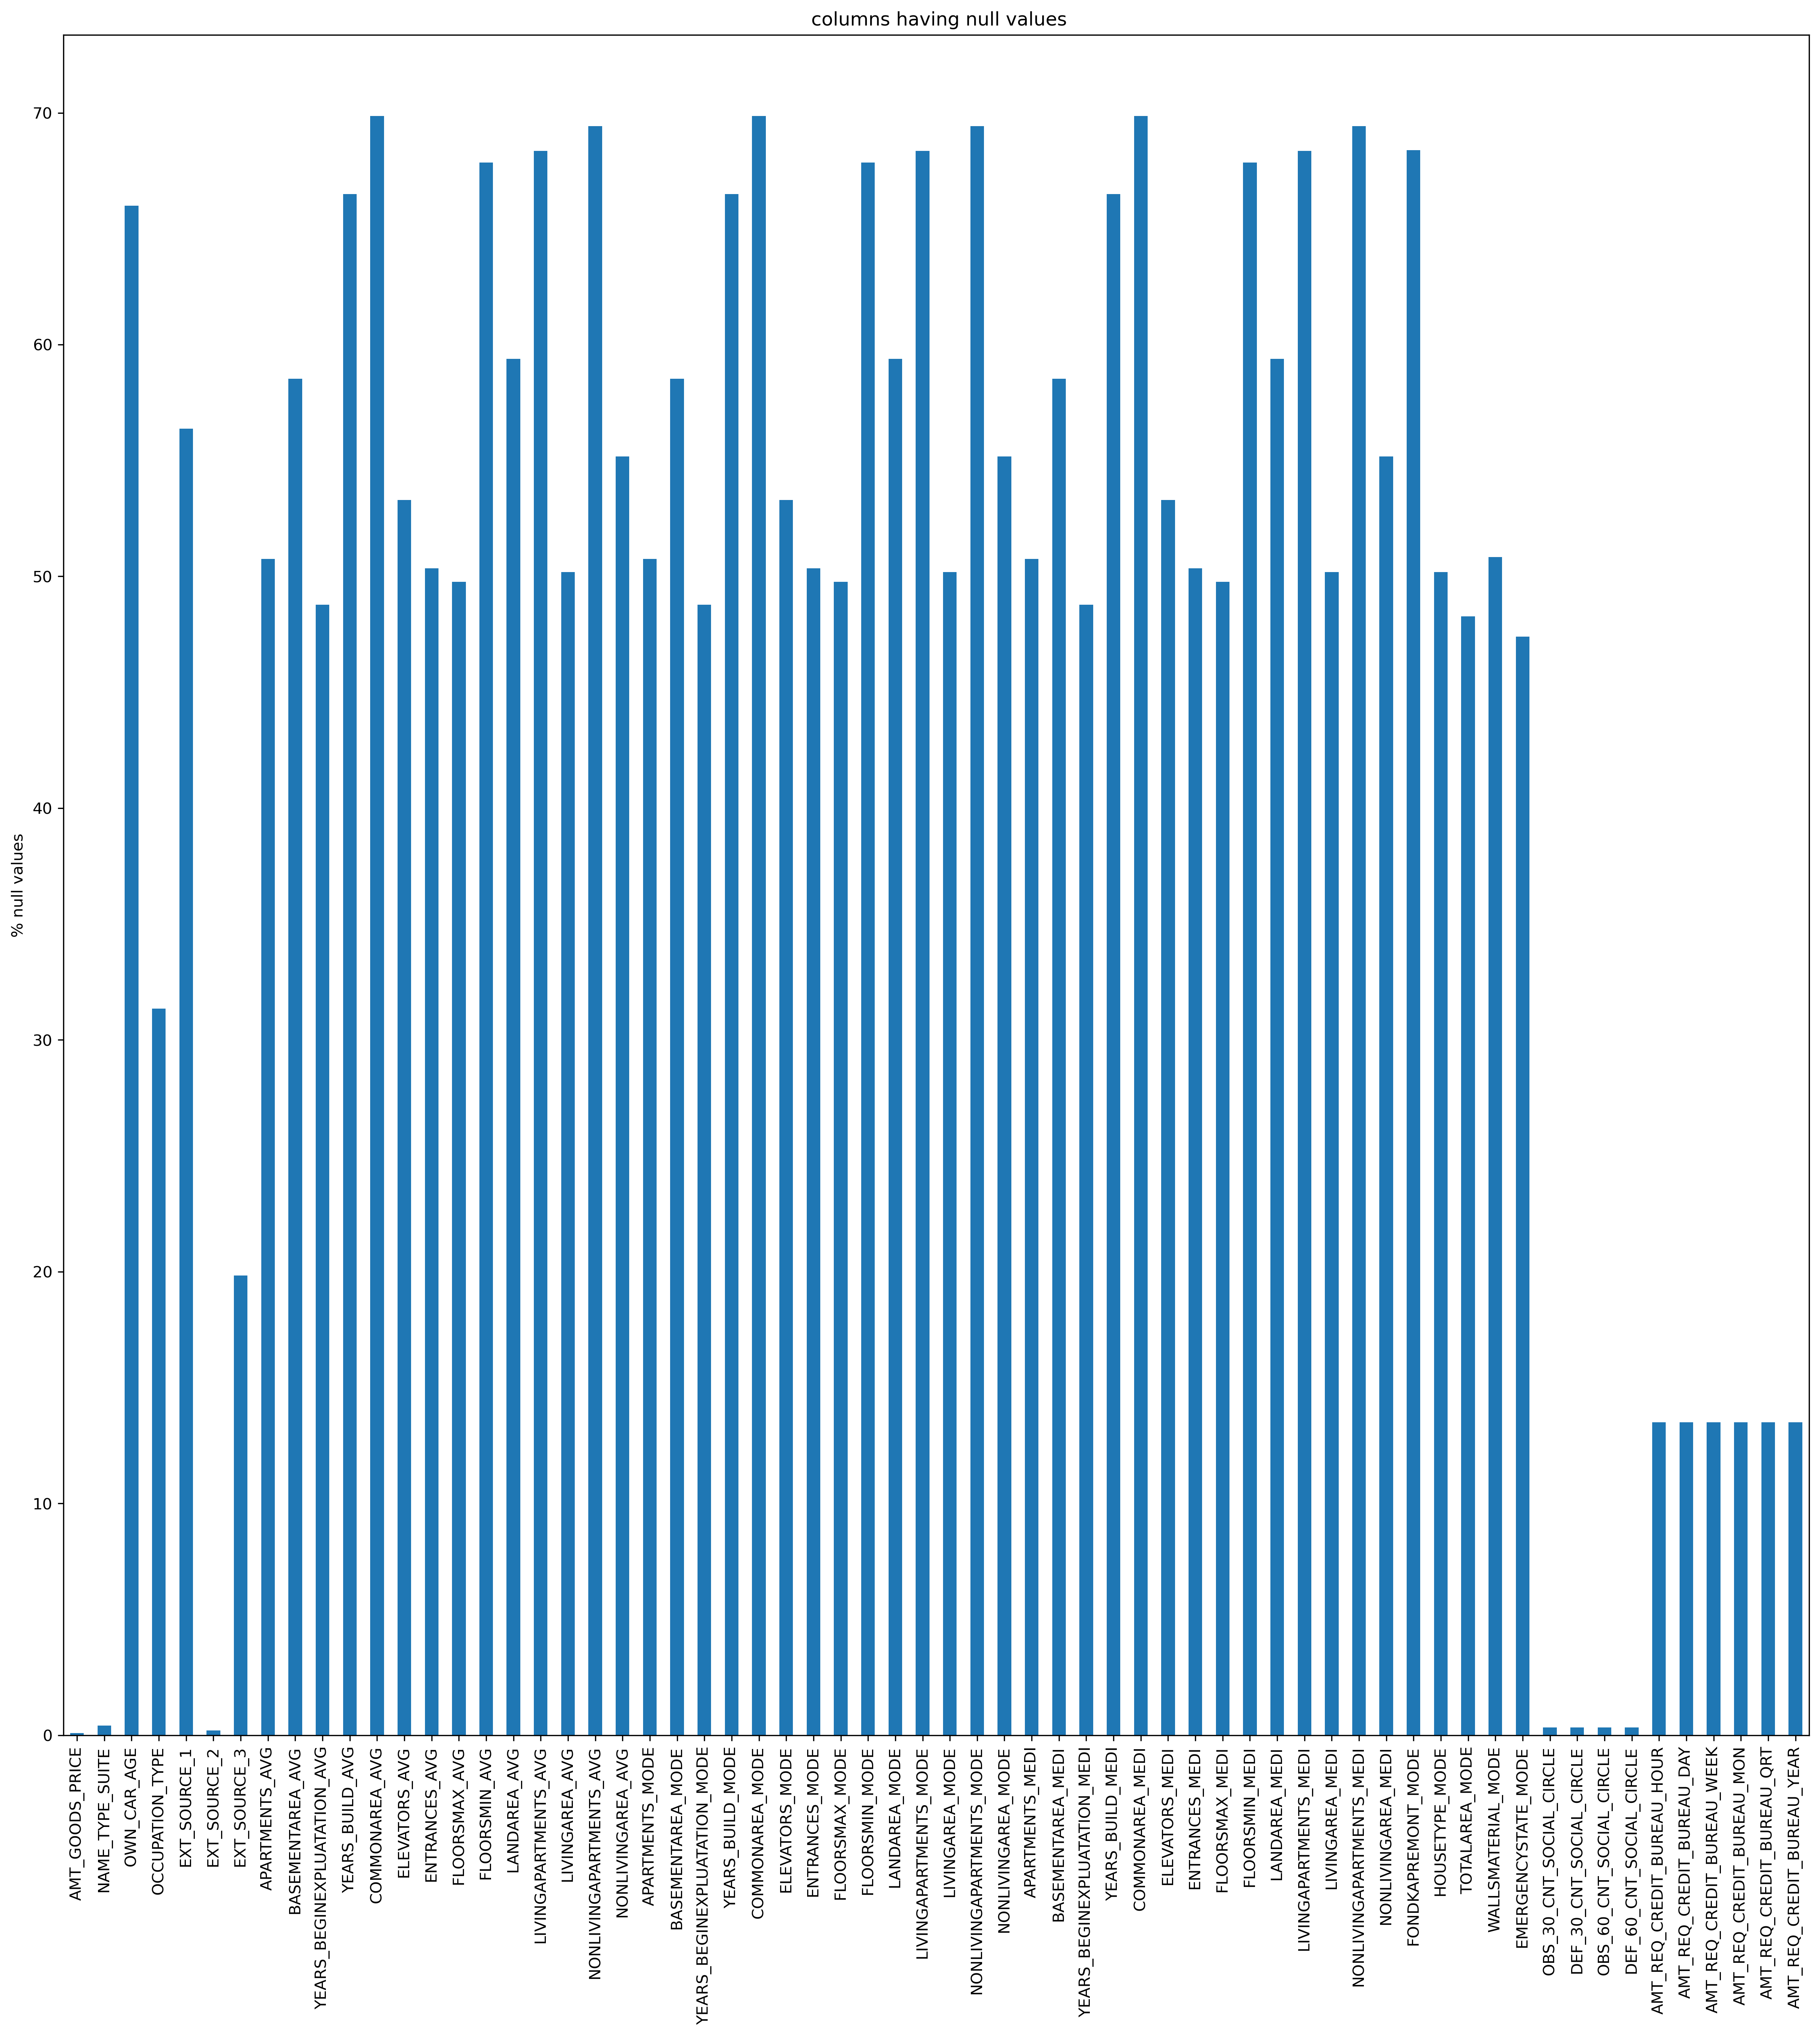

In [9]:
plt.figure(figsize= (20,20),dpi=300)
output.plot(kind = 'bar')
plt.title (' columns having null values')
plt.ylabel('% null values')
plt.show()

# HERE NULL VALUE PERCENTAGES OF EACH COLUMN IS SHOWN THROUGH THIS GRAPH
# BASED ON THIS GRAPH,WE CAN SEE WHICH COLUMNS HAVE MORE THAN 50% AND LESS THAN 50% NULL VALUES 

In [10]:
null=apply.isnull().mean().sort_values(ascending=False)
null*100
apply.columns[apply.isnull().mean()<=0.15]

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2',
       'FLAG_

In [11]:
default=apply[apply["TARGET"]==1]
non_default=apply[apply["TARGET"]==0]
default
# DATA HAS BEEN DIVIDED INTO DEFAULTERS AND NON-DEFAULTERS

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628,-6573.0,-1827,NaN,1,1,0,1,0,0,Cooking staff,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,NaN,0.548477,0.190706,0.0165,0.0089,0.9732,NaN,NaN,0.00,0.0690,0.0417,NaN,0.0265,NaN,0.0094,NaN,0.0000,0.0168,0.0092,0.9732,NaN,NaN,0.0000,0.0690,0.0417,NaN,0.0271,NaN,0.0083,NaN,0.0000,0.0167,0.0089,0.9732,NaN,NaN,0.00,0.0690,0.0417,NaN,0.0270,NaN,0.0096,NaN,0.0000,NaN,block of flats,0.0085,Wooden,Yes,10.0,1.0,10.0,0.0,-161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182.0,-1029,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,NaN,0.306841,0.320163,0.1309,0.1250,0.9960,0.9456,0.0822,0.16,0.1379,0.2500,0.2917,0.0142,0.1059,0.1267,0.0039,0.0078,0.1334,0.1297,0.9960,0

<BarContainer object of 7 artists>

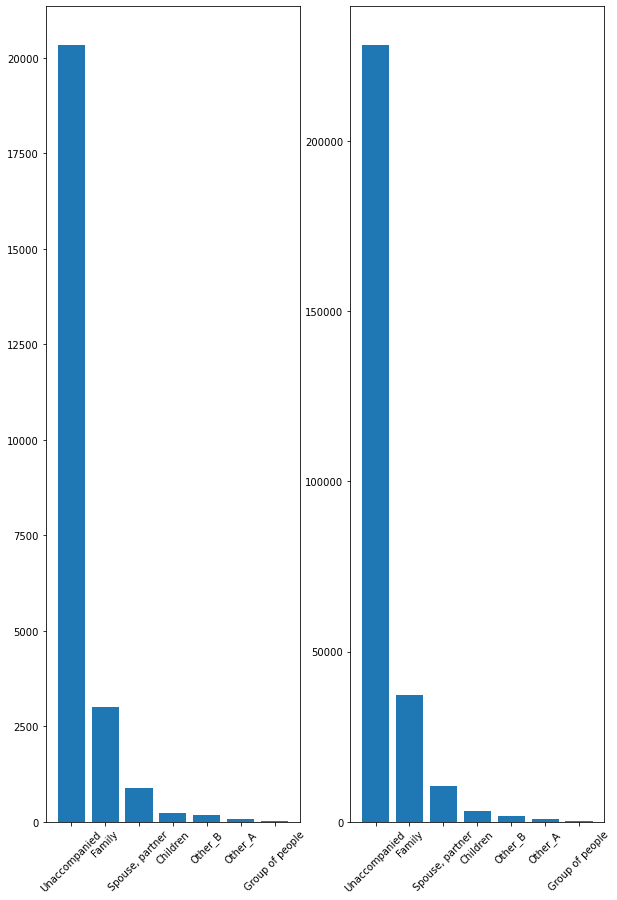

In [12]:
suite1=default["NAME_TYPE_SUITE"].value_counts(ascending=False)
suite2=non_default["NAME_TYPE_SUITE"].value_counts(ascending=False)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,15))
#sns.countplot(suite1,data=default)

plt.subplot(1,2,1)
plt.bar(suite1.keys(),suite1.values)
#ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
plt.xticks(rotation=45)
#ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
plt.bar(suite2.keys(),suite2.values)




# UNACCOMAPNIED FAMILIES ARE THE ONES WHO APPLY MORE LOANS THAN OTHERS AND 
# WE CAN SEE THAT NON-DEFAULTERS ARE MORE IN NUMBER THAN IN DEFAULTERS IN THIS CATEGORY

<BarContainer object of 6 artists>

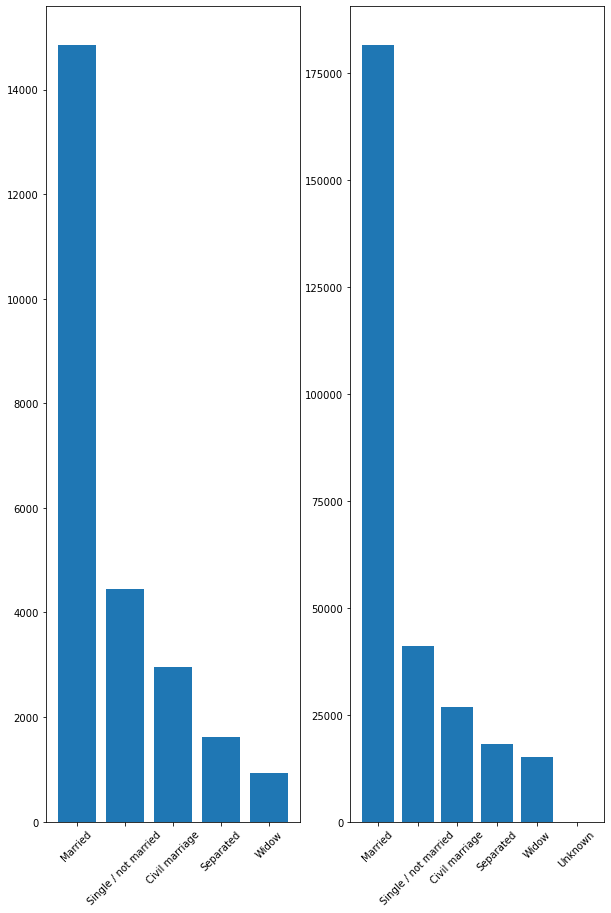

In [13]:
status1=default["NAME_FAMILY_STATUS"].value_counts(ascending=False)
status2=non_default["NAME_FAMILY_STATUS"].value_counts(ascending=False)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,15))
#sns.countplot(suite1,data=default)

plt.subplot(1,2,1)
plt.bar(status1.keys(),status1.values)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
plt.xticks(rotation=45)
plt.bar(status2.keys(),status2.values)


# MARRIED PEOPLE APPLY MORE LOAN THAN OTHERS
# IN SINGLE/NOT-MARRIED CATEGORY,DEFAULTERS ARE MORE IN NUMBER THAN NON-DEFAULTERS

<BarContainer object of 5 artists>

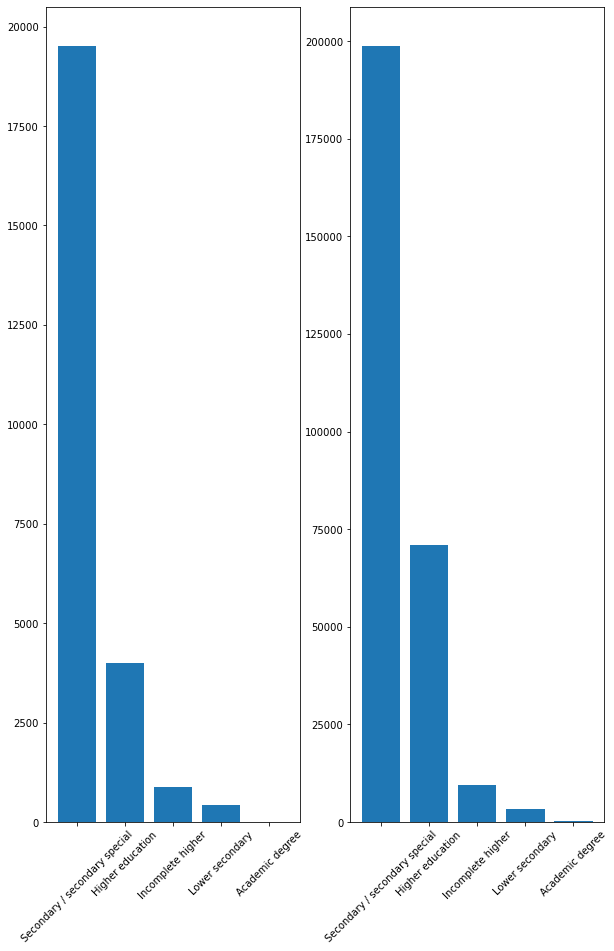

In [14]:
edu1=default["NAME_EDUCATION_TYPE"].value_counts(ascending=False)
edu2=non_default["NAME_EDUCATION_TYPE"].value_counts(ascending=False)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,15))
#sns.countplot(suite1,data=default)

plt.subplot(1,2,1)
plt.bar(edu1.keys(),edu1.values)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
plt.xticks(rotation=45)
plt.bar(edu2.keys(),edu2.values)

# SECONDARY/SECONDARY SPECIAL APPLY MORE LOANS THAN OTHERS AND TEND TO BE MORE DEFAULT THAN OTHER CATEGORY STUDENTS.
# MOST OF THE HIGHER EDUCATION STUDENTS ARE NON-DEFAULTERS.

<BarContainer object of 6 artists>

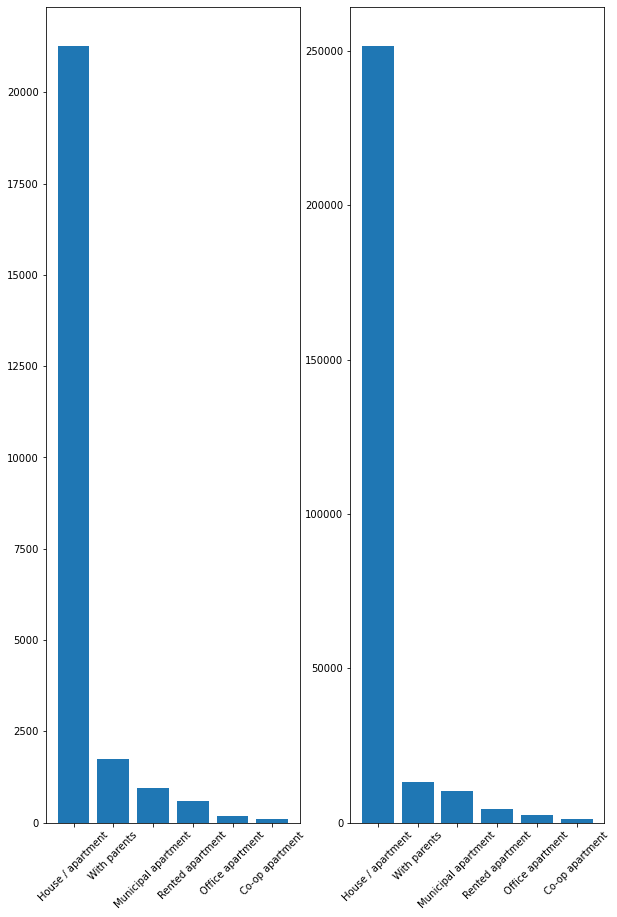

In [15]:
housing1=default["NAME_HOUSING_TYPE"].value_counts(ascending=False)
housing2=non_default["NAME_HOUSING_TYPE"].value_counts(ascending=False)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,15))
#sns.countplot(suite1,data=default)

plt.subplot(1,2,1)
plt.bar(housing1.keys(),housing1.values)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
plt.xticks(rotation=45)
plt.bar(housing2.keys(),housing2.values)

In [16]:
# PEOPLE LIVING IN HOUSE/APARTMENT APPLY MORE LOANS WHEN COMPARED TO OTHER HOUSING_TYPES AND MOST OF THEM ARE NON-DEFAULTERS
# DEFAULTERS RATE IS HIGHER THAN NON-DEFAULTERS FOR PEOPLE WHO LIVE WITH THEIR PARENTS.

<Figure size 1080x1080 with 0 Axes>

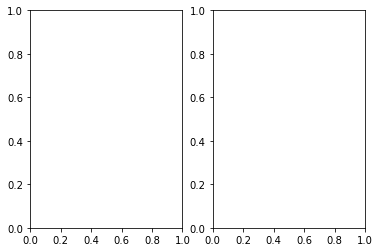

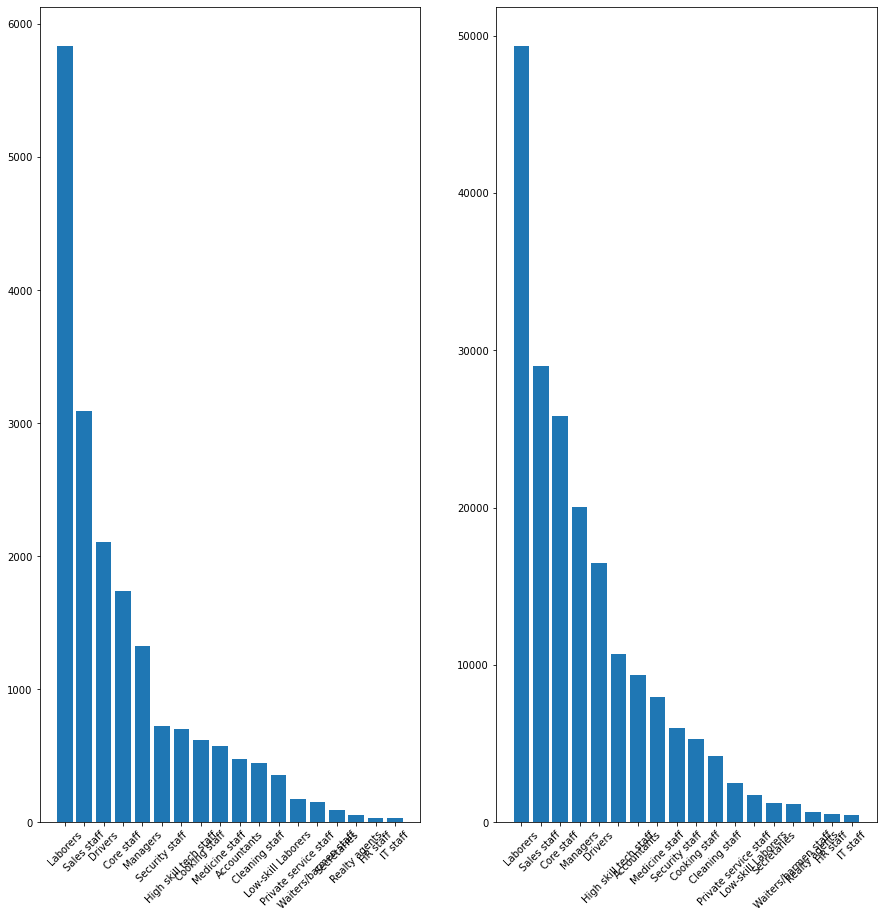

<Figure size 1080x1080 with 0 Axes>

In [17]:
occupation1=default["OCCUPATION_TYPE"].value_counts(ascending=False)
occupation2=non_default["OCCUPATION_TYPE"].value_counts(ascending=False)

fig,ax=plt.subplots(1,2)
#sns.countplot(suite1,data=default)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)

plt.bar(occupation1.keys(),occupation1.values)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
plt.xticks(rotation=45)
plt.bar(occupation2.keys(),occupation2.values)
plt.figure(figsize=(15,15))


In [18]:
# LABORERES APPLY MORE LOAN THAN OTHER PROFESSIONS.
# IT STAFF TENDS TO APPLY MINIMAL LOAN THAN OTHERS.

<BarContainer object of 2 artists>

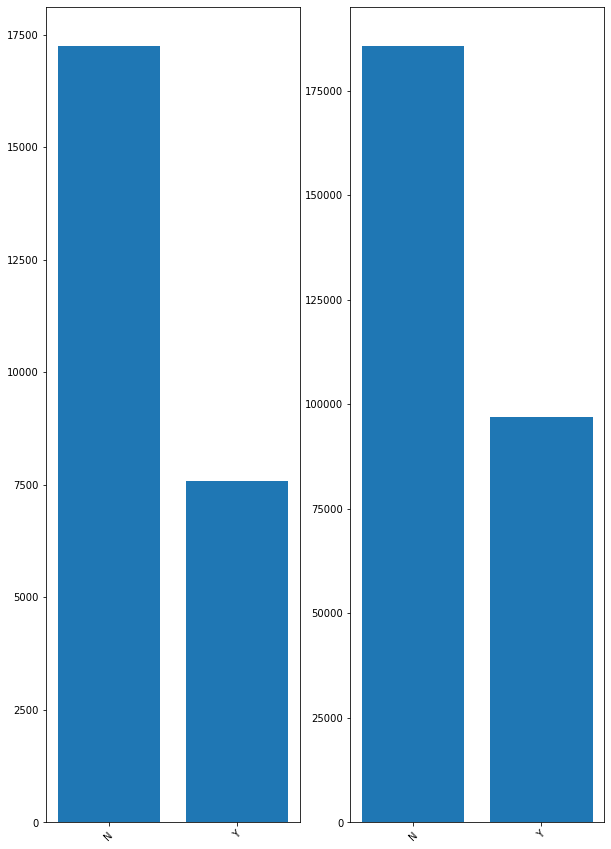

In [19]:
car1=default["FLAG_OWN_CAR"].value_counts(ascending=False)
car2=non_default["FLAG_OWN_CAR"].value_counts(ascending=False)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,15))
#sns.countplot(suite1,data=default)

plt.subplot(1,2,1)
plt.bar(car1.keys(),car1.values)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
plt.xticks(rotation=45)
plt.bar(car2.keys(),car2.values)

# MORE THAN 70% OF PEOPLE WHO HAVE CARS ARE DEFUALTERS AND NEARLY 60 % OF PEOPLE ARE NON-DEFAULTERS.

<BarContainer object of 2 artists>

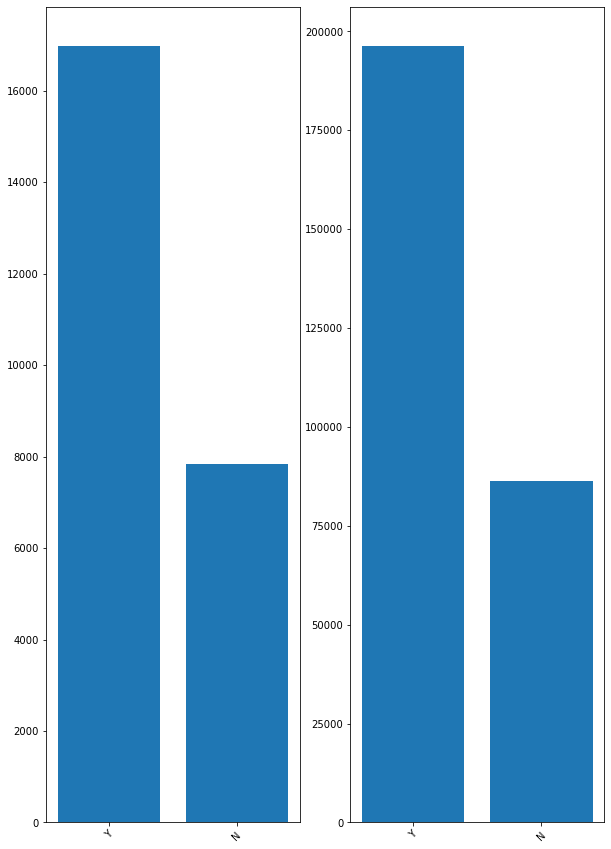

In [20]:
realty1=default["FLAG_OWN_REALTY"].value_counts(ascending=False)
realty2=non_default["FLAG_OWN_REALTY"].value_counts(ascending=False)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,15))
#sns.countplot(suite1,data=default)

plt.subplot(1,2,1)
plt.bar(realty1.keys(),realty1.values)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
plt.xticks(rotation=45)
plt.bar(realty2.keys(),realty2.values)

# GENERALLY PEOPLE WHO HAVE HOUSE/APARTMENT TEND TO APPLY FOR LOANS.

In [21]:
default["AGE"]=default["DAYS_BIRTH"].abs()//365.25
non_default["AGE"]=non_default["DAYS_BIRTH"].abs()//365.25
default["AGE"]
# CALCULATION OF AGE USING NUMBER OF DAYS_BIRTH

<ipython-input-21-44657ae7db9e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  default["AGE"]=default["DAYS_BIRTH"].abs()//365.25
<ipython-input-21-44657ae7db9e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_default["AGE"]=non_default["DAYS_BIRTH"].abs()//365.25


0         25
26        51
40        47
42        36
81        67
          ..
307448    27
307475    36
307481    56
307489    45
307509    32
Name: AGE, Length: 24825, dtype: int64

In [22]:
default["AGE"].describe()

count    24825.000000
mean        40.252931
std         11.474598
min         21.000000
25%         31.000000
50%         39.000000
75%         49.000000
max         68.000000
Name: AGE, dtype: float64

In [23]:
default["AGE_bins"]=pd.cut(default['AGE'],bins=np.arange(20,71,5))
non_default["AGE_bins"]=pd.cut(non_default['AGE'],bins=np.arange(20,71,5))
default["AGE_bins"]


<ipython-input-23-23572d9d4f0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  default["AGE_bins"]=pd.cut(default['AGE'],bins=np.arange(20,71,5))
<ipython-input-23-23572d9d4f0e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_default["AGE_bins"]=pd.cut(non_default['AGE'],bins=np.arange(20,71,5))


0         (20, 25]
26        (50, 55]
40        (45, 50]
42        (35, 40]
81        (65, 70]
            ...   
307448    (25, 30]
307475    (35, 40]
307481    (55, 60]
307489    (40, 45]
307509    (30, 35]
Name: AGE_bins, Length: 24825, dtype: category
Categories (10, interval[int64]): [(20, 25] < (25, 30] < (30, 35] < (35, 40] ... (50, 55] < (55, 60] < (60, 65] < (65, 70]]

C:\Users\P.Vijay Srinivasan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\P.Vijay Srinivasan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CODE_GENDER', ylabel='count'>

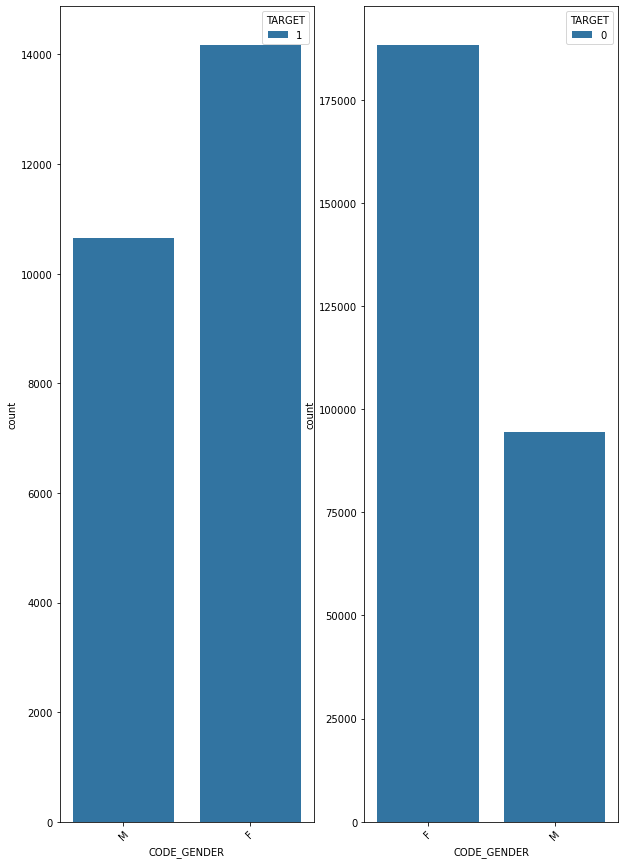

In [24]:
temp_default=default[default["CODE_GENDER"]!="XNA"]
temp_non_default=non_default[non_default["CODE_GENDER"]!="XNA"]
gender=temp_default["CODE_GENDER"]
gender1=temp_non_default["CODE_GENDER"]
# drop_rows=gender[g["CODE_GENDER"]=="XNA"]
fig,ax=plt.subplots(1,2,figsize=(10,15))
plt.subplot(1,2,1)
plt.xticks(rotation=45)
sns.countplot(gender,data=default,hue="TARGET")
plt.subplot(1,2,2)
plt.xticks(rotation=45)
sns.countplot(gender1,data=non_default,hue="TARGET")


# Females tend to apply more loans than males

In [25]:
apply['DAYS_BIRTH'] = apply['DAYS_BIRTH'].abs()
apply['DAYS_EMPLOYED'] =apply['DAYS_EMPLOYED'].abs()
apply["AGE"]=apply["DAYS_BIRTH"].abs()//365.25
apply["AGE_bins"]=pd.cut(apply['AGE'],bins=np.arange(20,71,5))

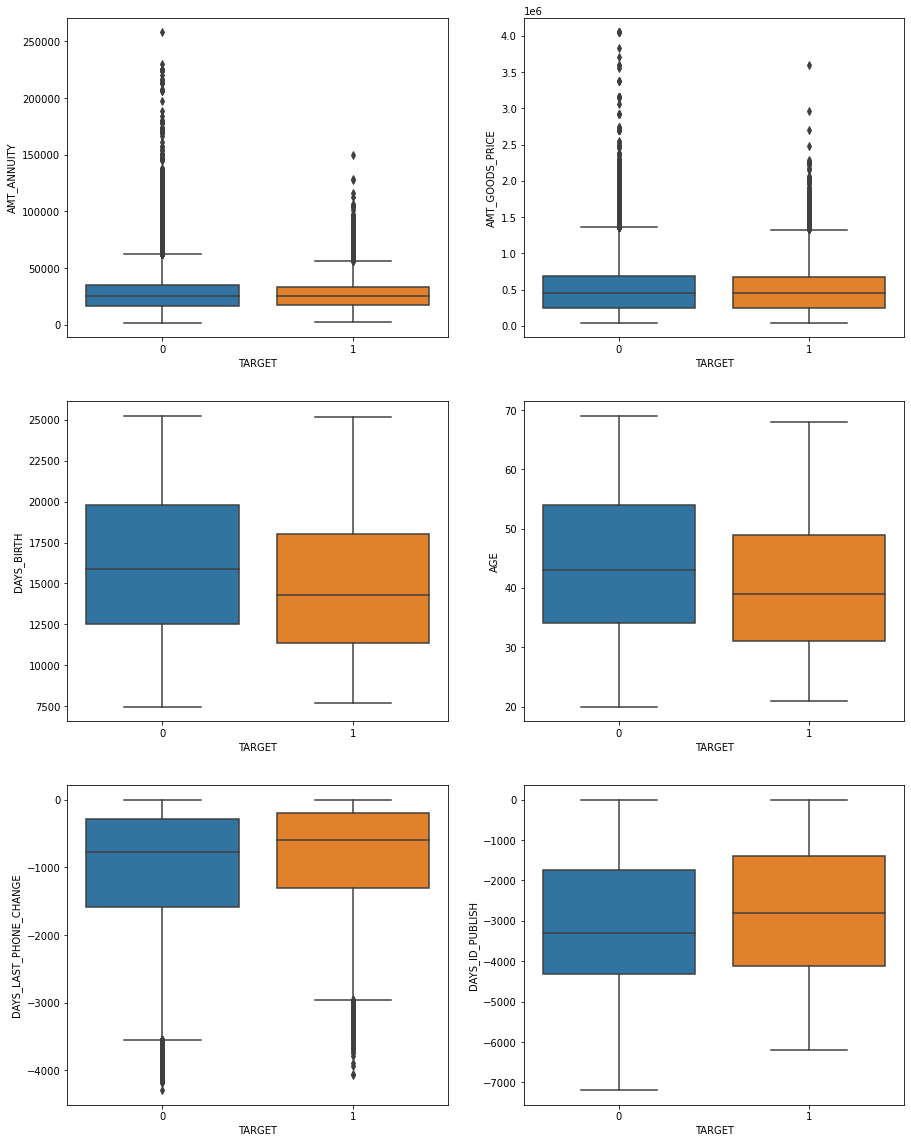

In [26]:
features = ['AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','AGE','DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH']
plt.figure(figsize = (15, 20))

for i in enumerate(features):
    plt.subplot(3, 2, i[0]+1)
#     plt.subplots_adjust(hspace=0.5)
    sns.boxplot(x = 'TARGET', y = i[1], data =apply)

# The people from age between 25 and 45 are having higher probability of repayment
# Less outliers is observed in Days_Birth  and days_id_publish
# Some outliers are observed in In 'AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED', DAYS_LAST_PHONE_CHANGE in the dataset
# people changing ID in recent days are prone to be default

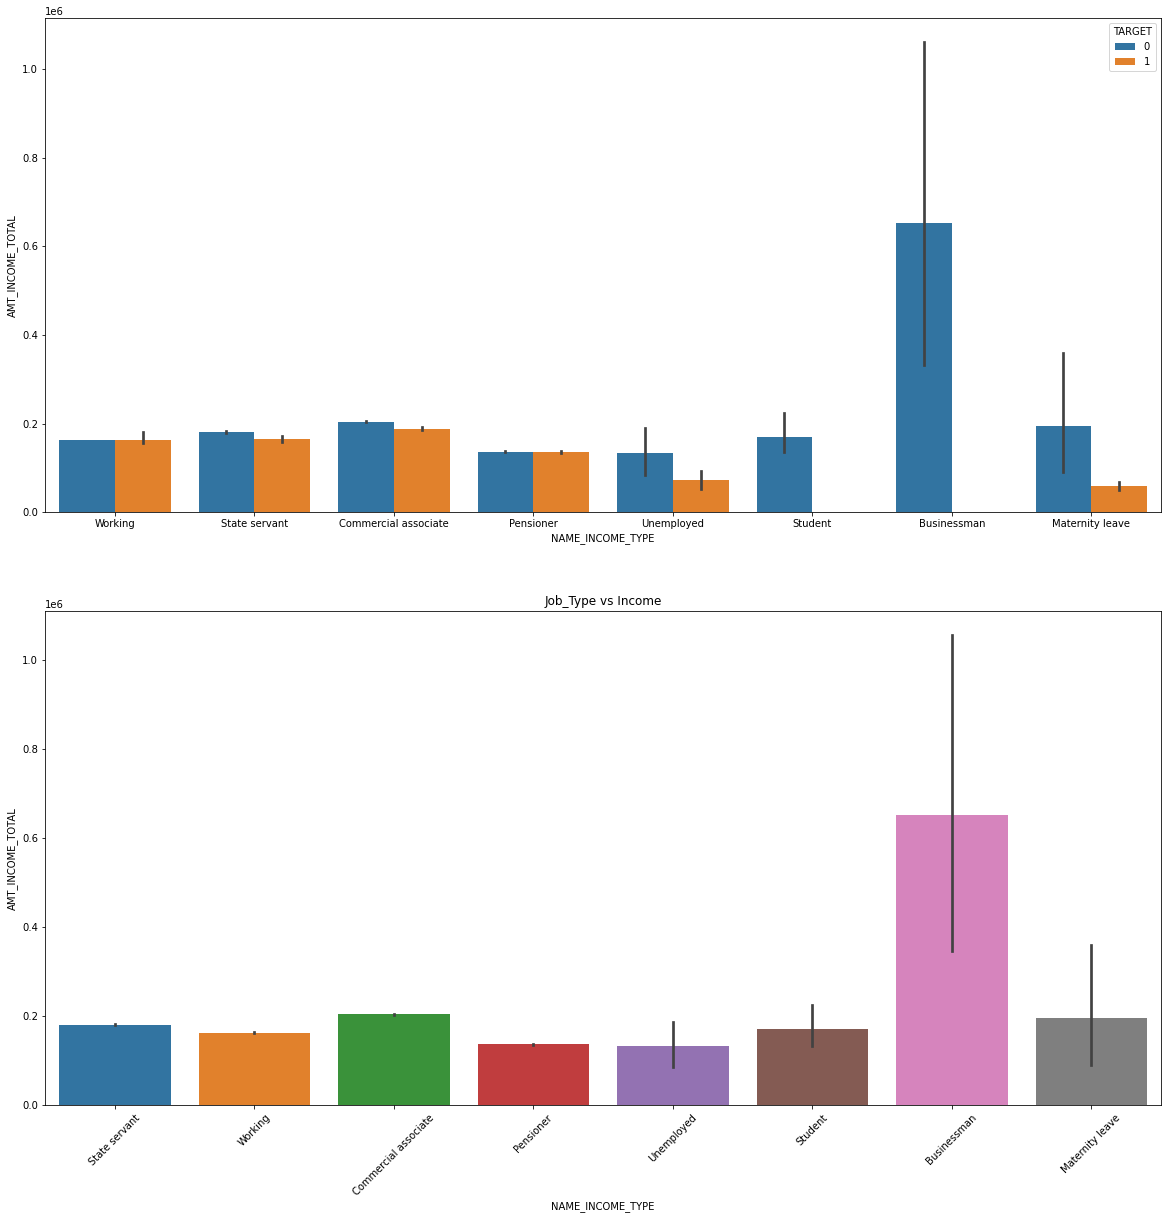

In [27]:
fig,ax=plt.subplots(2,2,figsize=(20,20))
plt.yscale('log')
plt.subplot(2,1,1)
# sns.barplot(data=default, x='NAME_INCOME_TYPE',y='AMT_INCOME_TOTAL',orient='v')
sns.barplot(data=apply, x='NAME_INCOME_TYPE',y='AMT_INCOME_TOTAL',hue="TARGET",orient='v')

plt.subplot(2,1,2)
sns.barplot(data=non_default, x='NAME_INCOME_TYPE',y='AMT_INCOME_TOTAL',orient='v')
plt.title('Job_Type vs Income')
plt.xticks(rotation=45)
plt.show()

# As we can see that business people have higher incomes than others and also they tend to apply for more loans and also repay it.


OCCUPATION TYPE vs ANNUAL INCOME


<AxesSubplot:xlabel='OCCUPATION_TYPE', ylabel='AMT_INCOME_TOTAL'>

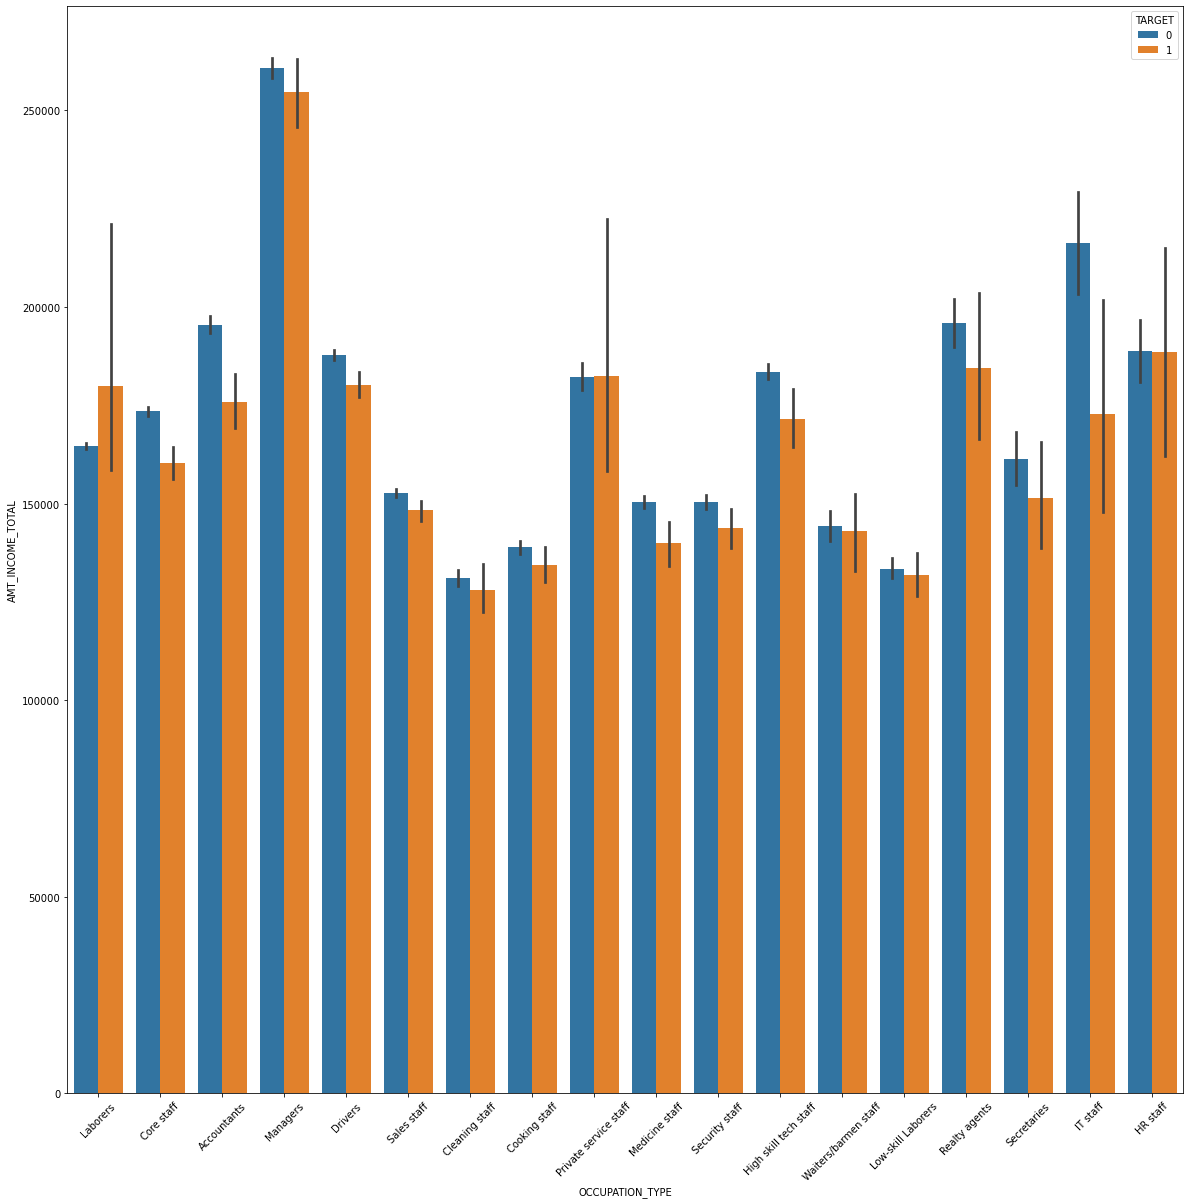

In [28]:
print("OCCUPATION TYPE vs ANNUAL INCOME")
plt.figure(figsize=(20,20))
plt.yscale('linear')
plt.xticks(rotation=45)
sns.barplot(data=apply, x='OCCUPATION_TYPE',y='AMT_INCOME_TOTAL',hue="TARGET",orient='v')
# REFERENCE FOR GRAPH COLORS:0-MEANS DEFAULTERS AND 1 MEANS NON-DEFAULTERS

# Managers recieve higher income per annum and also they tend to default more than other peple.
# Cleaning staff recieve lowest among others and they also tend to default but less compared to others.

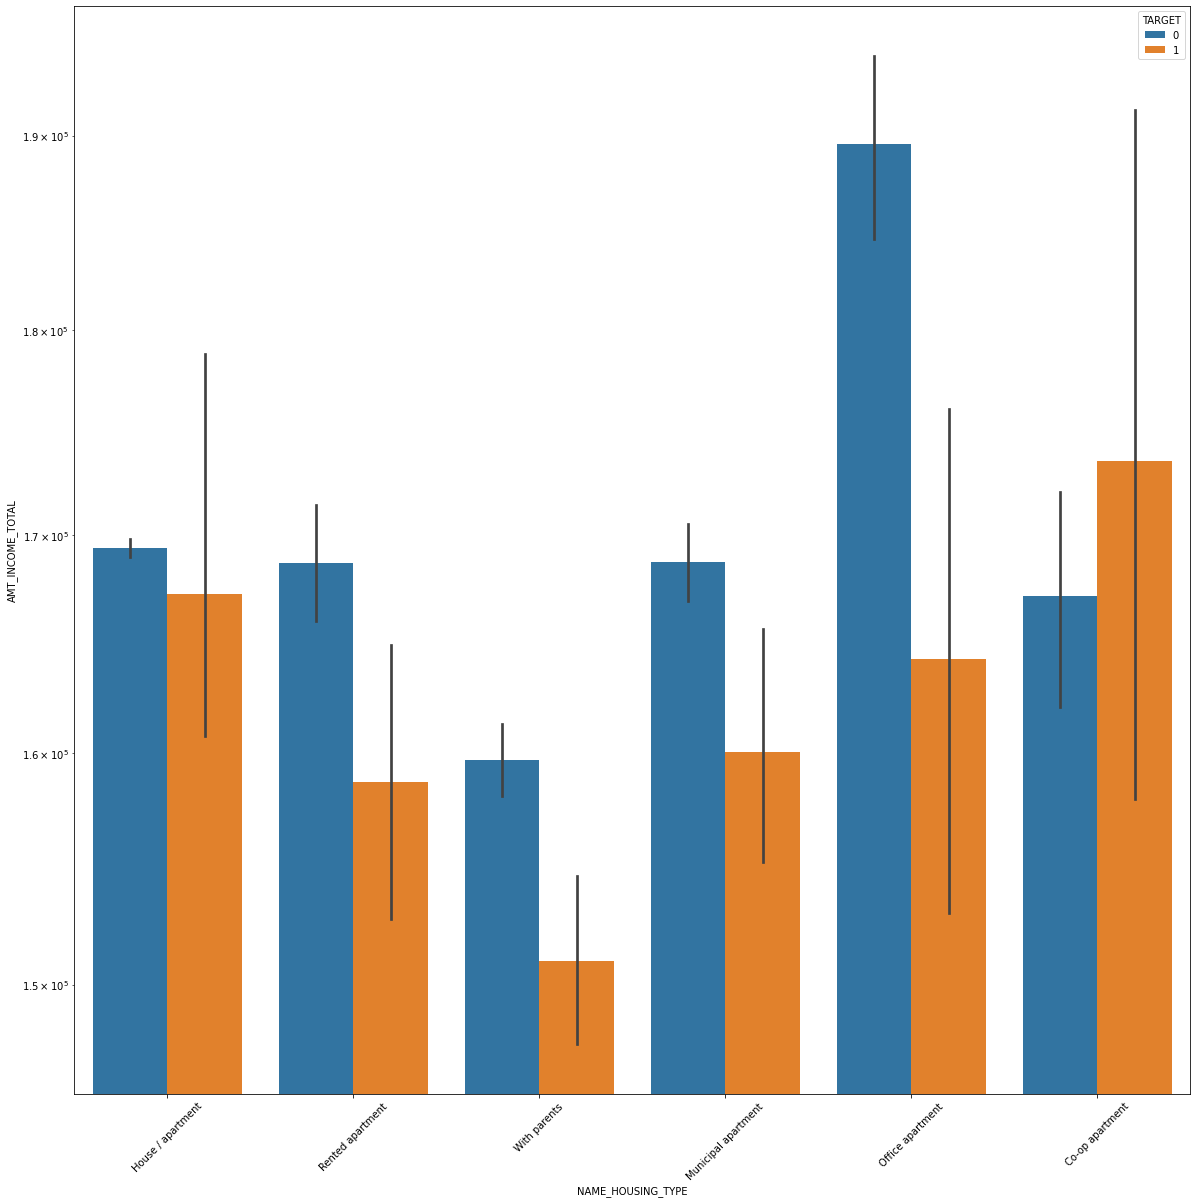

In [29]:
# fig,ax=plt.subplots(2,2,figsize=(20,20))
plt.figure(figsize=(20,20))
plt.xticks(rotation=45)
plt.yscale('log')
# plt.subplot(2,1,1)
sns.barplot(data=apply, x='NAME_HOUSING_TYPE',y='AMT_INCOME_TOTAL',hue="TARGET",orient='v')
plt.show()
# REFERENCE FOR GRAPH COLORS:0-MEANS DEFAULTERS AND 1 MEANS NON-DEFAULTERS

# People living in office apartment who don't have any payment difficulties tend to recieve more income so we can infer
# that as they recieve good income they can repay the loan within due date and same with people who live in rented and municipal
# apartments

# People living in co-op apartment have more payement difficulties and also they recieve low income.

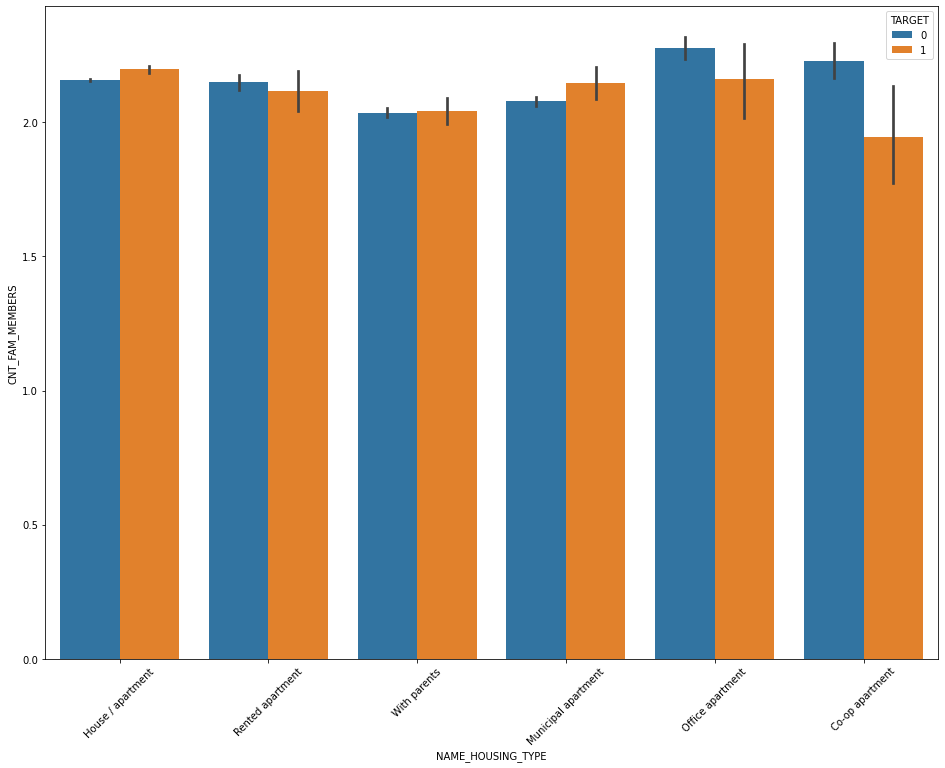

In [30]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
# plt.ylim(1,16)
# plt.yscale('linear')
sns.barplot(data=apply, x='NAME_HOUSING_TYPE',y='CNT_FAM_MEMBERS',hue="TARGET",orient='v')
# plt.title('Income amount vs Education Status')
plt.show()
# REFERENCE FOR GRAPH COLORS:0-MEANS DEFAULTERS AND 1 MEANS NON-DEFAULTERS


# We can see that most of the applicants have more than 2 family members
# As from the befoore graph we can conclude that most people who live in office apartments and rented apartments tend to be non_defaulters and have more than 2 family members 


# and people who live in co-op apartment have more payment difficulties and those people have <=2 family members. 
# Those who have their own house/apartment also apply loans but most of them tend to be defaulters

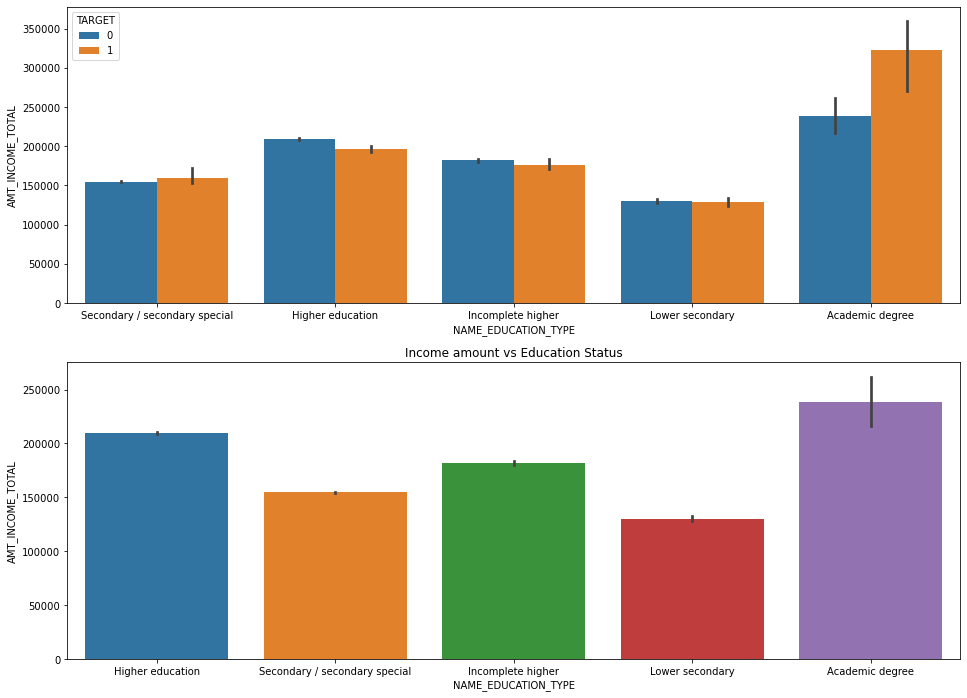

In [31]:
# plt.figure(figsize=(16,12))
# plt.xticks(rotation=90)
fig,ax=plt.subplots(1,2,figsize=(16,12))
plt.yscale('log')
plt.subplot(2,1,1)
sns.barplot(data=apply, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',hue="TARGET",orient='v')
plt.subplot(2,1,2)
sns.barplot(data=non_default, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',orient='v')
plt.title('Income amount vs Education Status')
plt.show()


In [32]:
# From the previous count plot about name_education_type,most people who have payment diffculties are secondary school students
# and their annual money is less than others.
# In both cases,people who have completed their academic degree tend to have more income than others.
# Most of the People who complete their higher education don't have payment difficulties.

C:\Users\P.Vijay Srinivasan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\P.Vijay Srinivasan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AGE_bins', ylabel='count'>

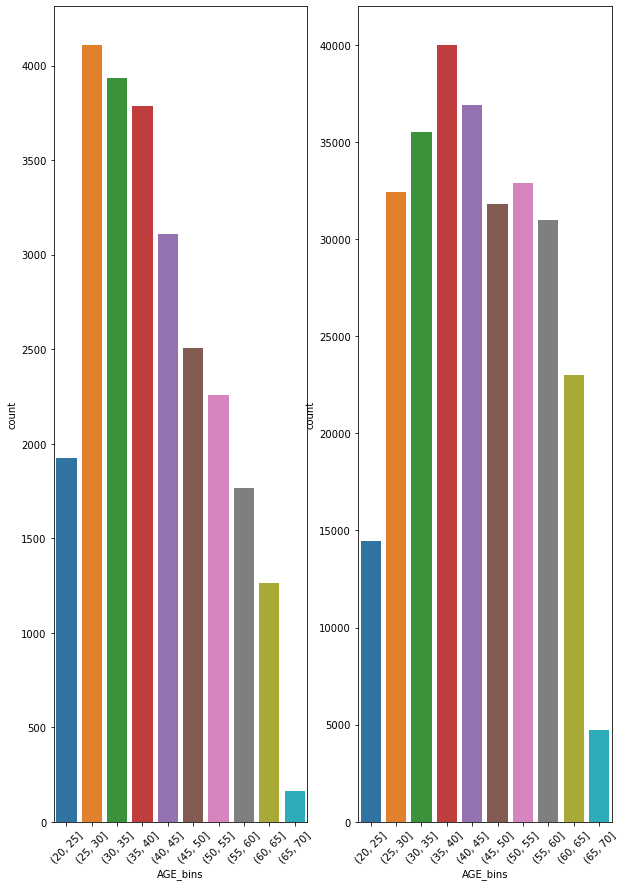

In [33]:
age=default["AGE_bins"]
age1=non_default["AGE_bins"]
fig,ax=plt.subplots(1,2,figsize=(10,15))
plt.subplot(1,2,1)
plt.xticks(rotation=45)
sns.countplot(age,data=default)
plt.subplot(1,2,2)
plt.xticks(rotation=45)
sns.countplot(age1,data=non_default)

# AGE_GROUPS FROM 25-45 TEND TO APPLY MORE LOANS.
# AMONG THEM, PEOPLE OF AGE 25-30 ARE  MORE DEFAULT WHEREAS 35-45 ARE THE PEOPLE WHO ARE LIKELY TO BE LESS DEFAULT

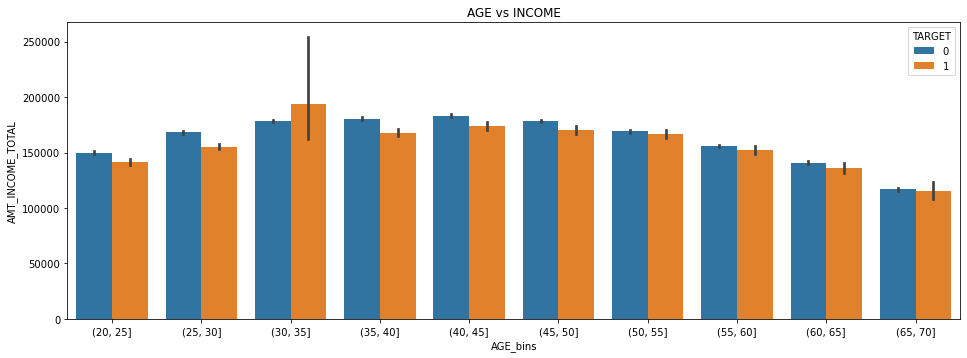

In [34]:
apply["AGE"]=apply["DAYS_BIRTH"].abs()//365.25
apply["AGE_bins"]=pd.cut(apply['AGE'],bins=np.arange(20,71,5))
plt.figure(figsize=(16,12))
plt.yscale('log')
plt.subplot(2,1,1)
sns.barplot(data=apply, x='AGE_bins',y='AMT_INCOME_TOTAL', hue ='TARGET',orient='v')
plt.title('AGE vs INCOME')
plt.show()

# From the above graph we can see that most of the people of age between 30-35 earns more than others and surprisingly some of them tend to be defaulters.

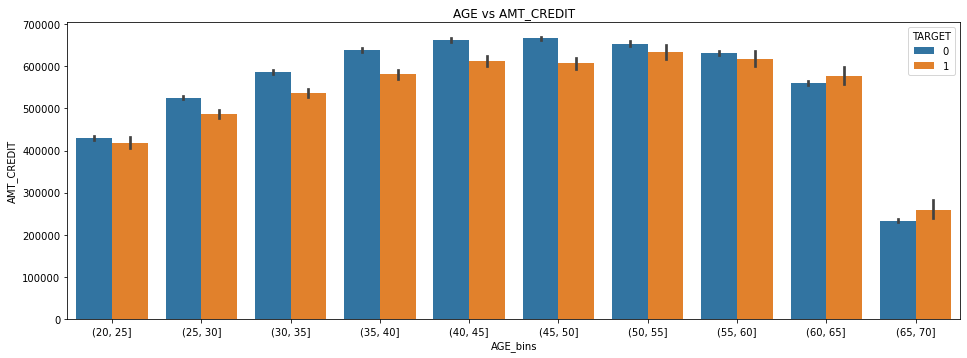

In [35]:
apply["AGE"]=apply["DAYS_BIRTH"].abs()//365.25
apply["AGE_bins"]=pd.cut(apply['AGE'],bins=np.arange(20,71,5))
plt.figure(figsize=(16,12))
plt.yscale('log')
plt.subplot(2,1,1)
sns.barplot(data=apply, x='AGE_bins',y='AMT_CREDIT', hue ='TARGET',orient='v')
plt.title('AGE vs AMT_CREDIT')
plt.show()

# From the above graph we can see that People of age 40-60 tend to apply AMT_Credit to reduce their income tax bill

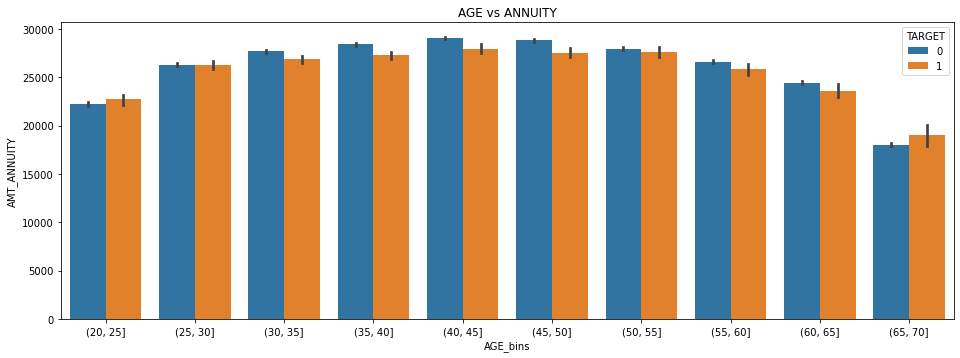

In [36]:
apply["AGE"]=apply["DAYS_BIRTH"].abs()//365.25
apply["AGE_bins"]=pd.cut(apply['AGE'],bins=np.arange(20,71,5))
plt.figure(figsize=(16,12))
plt.yscale('log')
plt.subplot(2,1,1)
sns.barplot(data=apply, x='AGE_bins',y='AMT_ANNUITY', hue ='TARGET',orient='v')
plt.title('AGE vs ANNUITY')
plt.show()

# From the graph we can see that people of age 40-45 are having higher rate of annuity.
# Old people of age 65-70 have low annuity rate.

Text(0, 0.5, 'CNT_FAM_MEMBERS')

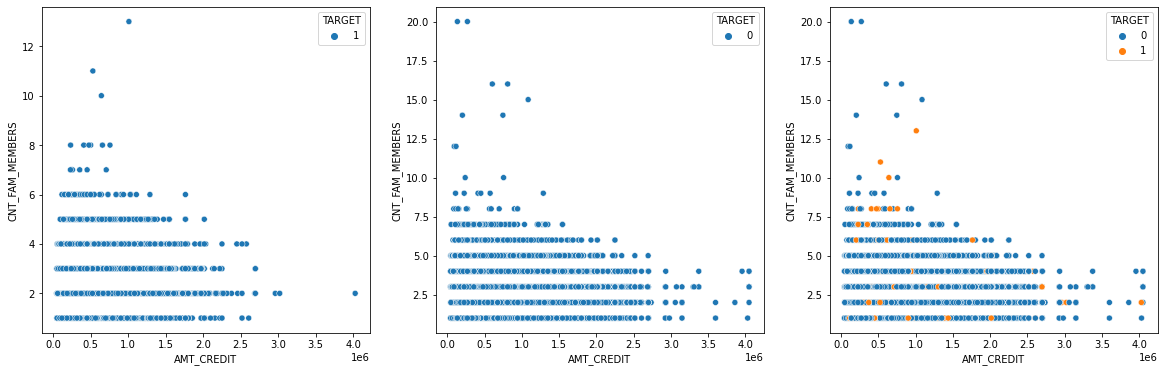

In [39]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,6))
sns.scatterplot(x='AMT_CREDIT', y='CNT_FAM_MEMBERS',hue="TARGET",data=apply,ax=ax3)
# sns.scatterplot(x='AMT_CREDIT', y='CNT_FAM_MEMBERS',hue="TARGET",data=default,ax=ax1)
# sns.scatterplot(x='AMT_CREDIT', y='CNT_FAM_MEMBERS',hue="TARGET",data=non_default,ax=ax2)
plt.title("AM")
ax1.set_xlabel('AMT_CREDIT')    
ax1.set_ylabel('CNT_FAM_MEMBERS')

# if the family is small and amt-credit is low,we can assume that they are likely to be  more default.

CONCLUSION:
1)Unaccompanied families are the one who apply more loans . Non defaulters are more than defaulters.Defaulters are more among people who are single

2)Married people usually apply more loans.

3)Student pursuing higher education tend to apply more loans and most of them also are non defaulters.

4)People living in house/apartment apply more loans than other people in different housing types

5)Among many number of occupations,laboreres  tend to apply more loans.

6)Most of the people who have cars tend to be default more.

7)People who are of age 25-45 tend to apply more loans.Among them,people who are of age 25-30 tend to default more and people of age 30-45 are likely to be less defualt.

8)We can see that most of the people of age between 30-35recieves higher income than other age groups and surprisingly some of them tend to be defaulters.

RECOMMENDATION:
1)Bank should avoid giving loans to students who pursue secondary education as they are having difficulties in payment.

2)Banks can concentrate on giving loans to people living in house/apartment than other housing types 
because most of them tend to replay the loans(non deafulters)

3)Banks should avoid giving loans to people who live in co-op aparments as they have payment diffculties due to their 
less income.

4)Banks can focus giving loans to people who live in own house,office apartments as they have higher income and they have
less default record.


5)Banks should avoid giving loans to people of age 25-30 as they have less income than people of age 31-40.

6)So banks can provide loans to people of age those who are above 30 as they recieve higher income with a well-experienced job
so there are high chances that they can repay the loan without any payment difficulties.